In [209]:
import os, glob
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import fitsio
import numpy as np
import drms
import matplotlib.colors as colors
import sunpy.visualization.colormaps as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
aia193 = matplotlib.colormaps['sdoaia193']

In [77]:
client = drms.Client()
client.series(r'aia.lev1_euv_12s')

['aia.lev1_euv_12s']

In [81]:
aia = client.info('aia.lev1_euv_12s')
aia.segments

,type,units,protocol,dims,note
name,,,,,
image,int,None,link via lev1,None,AIA level 1 image
spikes,int,None,link via lev1,None,Cosmic ray information


In [253]:
qstr = "aia.lev1_euv_12s[2010-07-25T18:00:12Z/1h@5m][131,304]{image}"
keys = [
    "T_REC",
    "T_OBS",
    "DATAMIN",
    "DATAMAX",
    "DATAMEAN",
    "DATARMS",
    "DATASKEW",
    "DATAKURT",
    "QUALITY",
    "WAVELNTH"
]
result = client.query(qstr, key=keys)

In [254]:
result[result.QUALITY == 0]

,T_REC,T_OBS,DATAMIN,DATAMAX,DATAMEAN,DATARMS,DATASKEW,DATAKURT,QUALITY,WAVELNTH
0,2010-07-25T18:00:14Z,2010-07-25T18:00:23.07Z,-39,2075,9.1286,15.92,8.56,239.06,0,131
1,2010-07-25T18:00:14Z,2010-07-25T18:00:15.57Z,-6,16340,65.2502,92.67,8.69,498.81,0,304
2,2010-07-25T18:05:14Z,2010-07-25T18:05:23.07Z,-46,1877,9.1515,16.21,9.42,268.20,0,131
3,2010-07-25T18:05:14Z,2010-07-25T18:05:15.57Z,-8,13537,65.3244,93.83,8.58,328.84,0,304
4,2010-07-25T18:10:14Z,2010-07-25T18:10:23.07Z,-39,993,9.1634,16.02,7.77,128.18,0,131
5,2010-07-25T18:10:14Z,2010-07-25T18:10:15.57Z,-6,10098,65.3820,93.91,7.74,211.33,0,304
6,2010-07-25T18:15:14Z,2010-07-25T18:15:23.07Z,-42,833,9.1338,15.93,7.60,122.05,0,131
7,2010-07-25T18:15:14Z,2010-07-25T18:15:15.57Z,-8,9015,65.1831,91.90,6.57,145.07,0,304
8,2010-07-25T18:20:14Z,2010-07-25T18:20:23.07Z,-42,962,9.1488,16.00,7.75,130.58,0,131
9,2010-07-25T18:20:14Z,2010-07-25T18:20:15.57Z,-7,7654,65.3251,91.85,6.18,113.83,0,304


In [255]:
result = client.export(qstr, method="url", protocol='fits', email='rattie@gmu.edu')

In [256]:
result.download(os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'images'))

,record,url,download
0,aia.lev1_euv_12s[2010-07-25T18:00:14Z][131],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
1,aia.lev1_euv_12s[2010-07-25T18:00:14Z][304],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
2,aia.lev1_euv_12s[2010-07-25T18:05:14Z][131],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
3,aia.lev1_euv_12s[2010-07-25T18:05:14Z][304],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
4,aia.lev1_euv_12s[2010-07-25T18:10:14Z][131],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
5,aia.lev1_euv_12s[2010-07-25T18:10:14Z][304],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
6,aia.lev1_euv_12s[2010-07-25T18:15:14Z][131],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
7,aia.lev1_euv_12s[2010-07-25T18:15:14Z][304],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
8,aia.lev1_euv_12s[2010-07-25T18:20:14Z][131],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...
9,aia.lev1_euv_12s[2010-07-25T18:20:14Z][304],http://jsoc.stanford.edu/SUM38/D1585067370/S00...,/mnt/data2/SDO/AIA/images/aia.lev1_euv_12s.201...


In [174]:
images_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'images')
im_fits = sorted(glob.glob(os.path.join(images_dir, 'aia*.fits')))
len(im_fits)
aia_images, headers = zip(*[fitsio.read(f, header=True) for f in im_fits])

In [102]:
spikes_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'spikes')
sp_fits = sorted(glob.glob(os.path.join(spikes_dir, '2010', '07', '25', '2010-07-25T18:*0193.spikes.fits')))
sp_data = [fitsio.read(f) for f in sp_fits]
sp_data = np.concatenate(sp_data, axis=1)
print(len(sp_fits), len(sp_data), sp_data.shape)

207 3 (3, 1949180)


In [119]:
x = sp_data[0, ...]%4096
y = sp_data[0, ...]//4096
sp_data[0]
hdata, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))

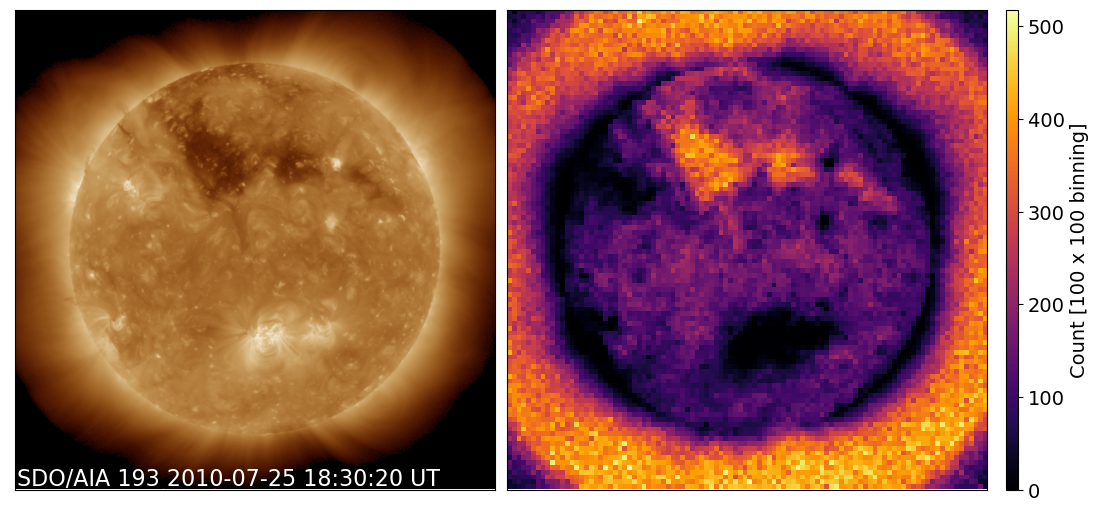

In [252]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
plt.rcParams.update({'font.size':14})
i = 6
aia = aia_images[i]
aia[aia<0] = 0
vmin = 10 #np.percentile(aia_images[6], 0.01)
vmax = aia.max() #np.percentile(aia_images[6], 99.9)
axs = []
fig = plt.figure(figsize=(12, 6))
axs.append(fig.add_axes([0.05, 0.1, 0.4, 0.8]))
axs.append(fig.add_axes([0.46, 0.1, 0.4, 0.8]))
im1 = axs[0].imshow(aia_images[6], origin='lower', cmap=aia193, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
axs[0].text(20, 30, f"SDO/AIA 193 {headers[i]['T_OBS'][:-4].replace('T', ' ')} UT", color='white', fontsize=16)
axs[0].set_xticks([])
axs[0].set_yticks([])
# # fig.colorbar(im1, ax=axs[0])
im2 = axs[1].imshow(hdata.T, origin='lower', cmap='inferno', extent = [0, 4095, 0, 4095])
axs[1].set_xticks([])
axs[1].set_yticks([])
axins = axs[1].inset_axes([1.04, 0, 0.025, 1.0])
cb1 = fig.colorbar(im2, ax=axs[1], cax=axins, label='Count [100 x 100 binning]')
# plt.tight_layout()
plt.savefig('spikes_heatmap_raphael.png')


In [168]:
vm

12370

Text(0, 0.5, 'Y [px]')

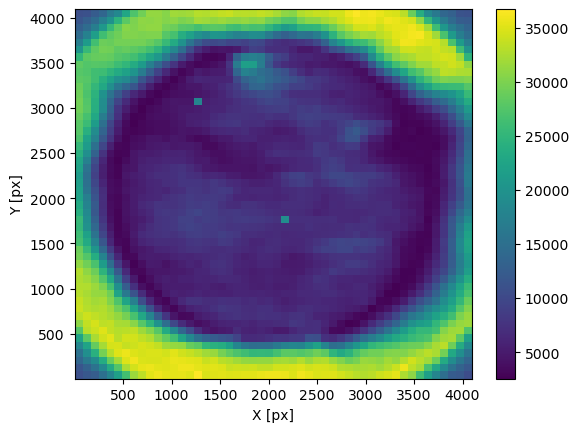

In [71]:
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.viridis)
plt.colorbar()
plt.xlabel('X [px]')
plt.ylabel('Y [px]')

In [36]:
# 